## Proyecto aplicado: Comparación de la sensibilidad de los algoritmos de clasificación bosque aleatorio y extreme gradient boosting ante alteraciones de un conjunto de datos de intención de compra

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from numpy import std
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score
import xgboost

In [ ]:
raw_data = pd.read_csv("/content/online_shoppers_intention.csv")
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


# Análisis exploratorio


Determinar cuantos y cuales atributos aportan valor a las predicciones que se plantean realizar:

In [ ]:
raw_data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


Revenue
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

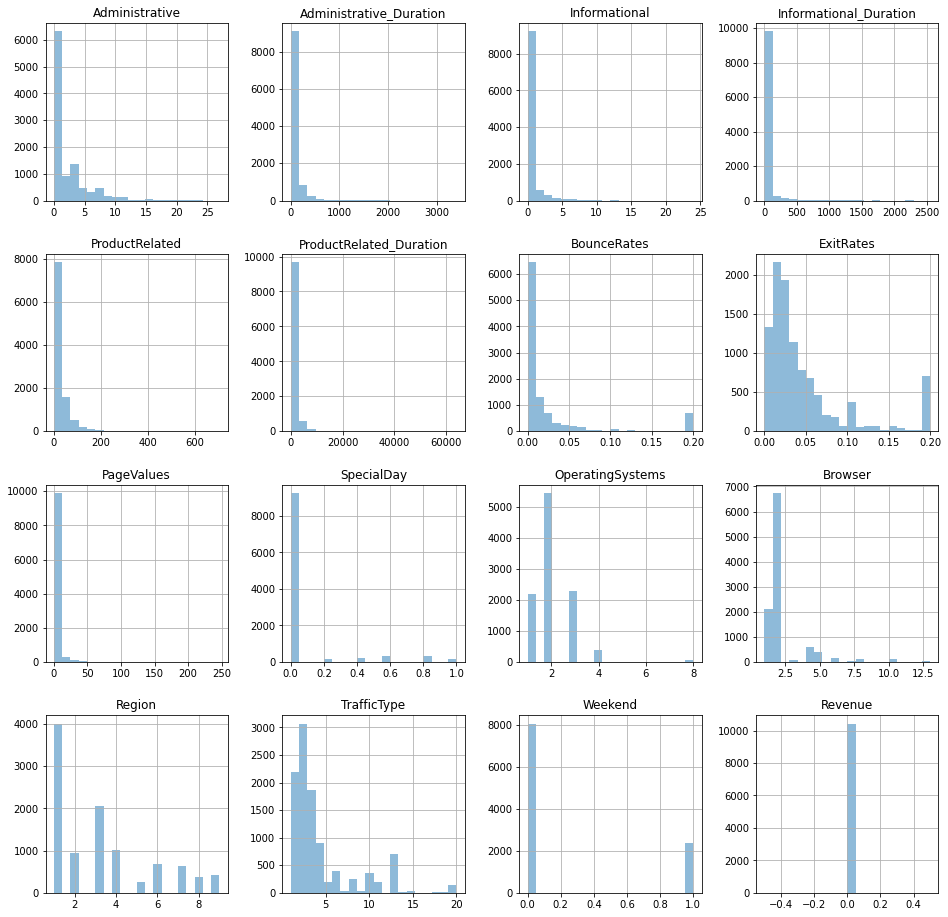

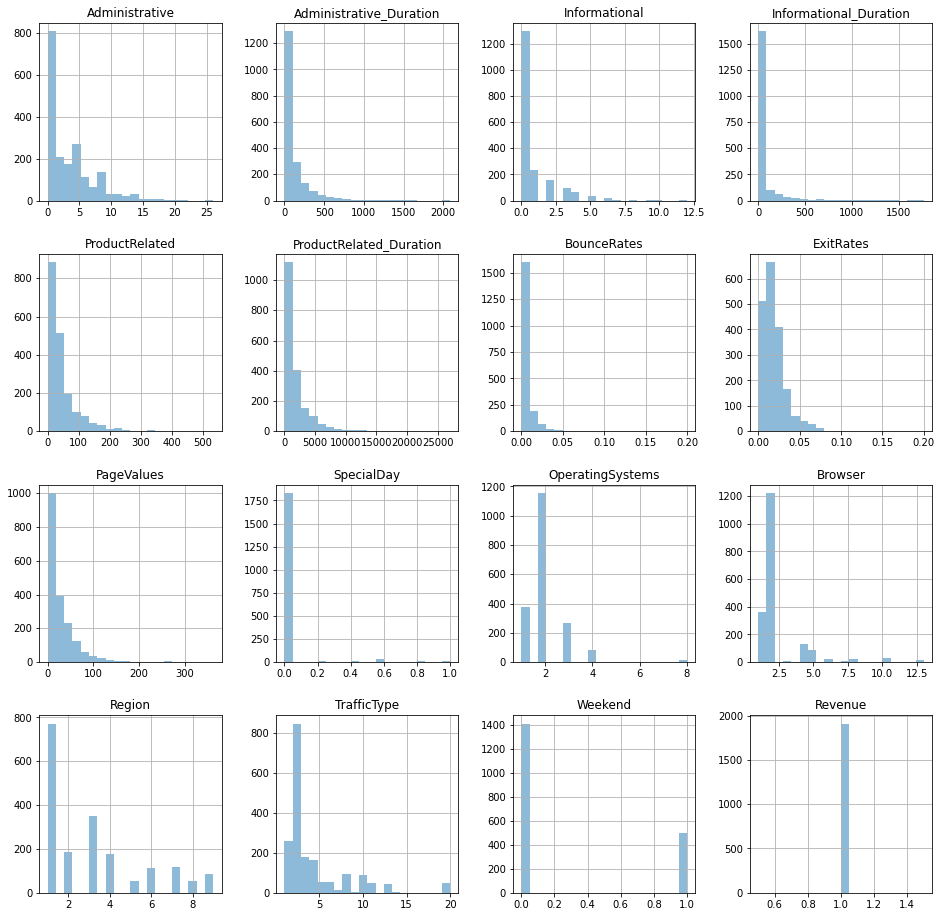

In [ ]:
raw_data.groupby(raw_data.Revenue).hist(bins=20, alpha=0.5, figsize=(16,16))

#### Correlación entre atributos

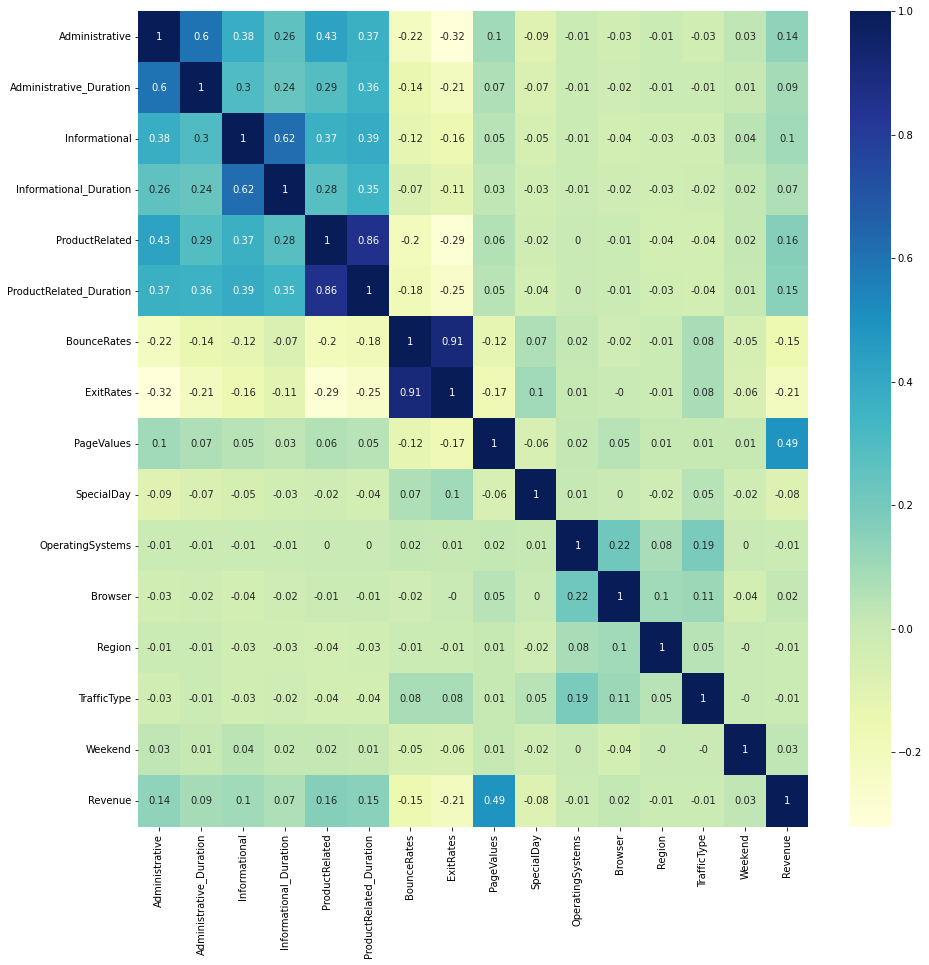

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
matrix = raw_data.corr().round(2)
sns.heatmap(matrix, annot=True, ax=ax, cmap="YlGnBu")
plt.show()

In [ ]:
raw_data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

#Transformación de datos

En este caso fue necesario realizar  una transofrmación de la variable Month en la cual se pasó de los datos de tipo categórico (String) a numéricos para representar los distintos meses. 

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
raw_data['Month'] = le.fit_transform(raw_data['Month'])

La segunda transformación que se realizó fue descartar la variable Visitor_Type ya que no aportaba al análisis.

In [ ]:
raw_data = raw_data.drop(["VisitorType"], axis=1)

# Metodos para perturbar el dataset de compras

Función: metodo que permite realizar la perturbación en el conjunto de datos indicado. 
Parametros:
- alfa: valor constante.
- columna_a_perturbar: atributo que será modificado.
- cant_datos_perturbar: indica el número de observaciones que serán modificadas.
- x_test_a_modificar: subconjunto de datos a modificar.

In [ ]:
import random
from numpy.ma.core import std
def crear_perturbacion(alfa, columna_a_perturbar, cant_datos_pertubar, x_test_a_modificar):
  for i in range(cant_datos_pertubar):
    desviacion_estandar = x_test_a_modificar[columna_a_perturbar].std()
    cambio = alfa * desviacion_estandar
    indice = random.randint(0,cant_datos_pertubar)
    valor_inicial = x_test_a_modificar[columna_a_perturbar][indice]
  
    if(i % 2 == 0):
      valor_modificado = valor_inicial + cambio
    else:
      valor_modificado = valor_inicial - cambio 
    x_test_a_modificar.at[indice, columna_a_perturbar]= valor_modificado
    x_test_nuevo = x_test_a_modificar

  return x_test_nuevo

### Seleccionar columnas
Método encargado de seleccionar columnas  candidatas a ser perturbadas de forma aleatoria de acuerdo a la cantidad de columnas que se le pasen por parámetro. Retorna una lista con los nombres de las columnas y no posee reemplazo, es decir, una vez que se elige una columna no puede ser elegida nuevamente en el mismo llamado del método.

In [ ]:
def seleccionar_columnas(cant_columnas):
  columnas_a_perturbar = ["Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","PageValues","ExitRates"]
  columnas = random.sample(columnas_a_perturbar, cant_columnas)
  return columnas

In [ ]:
def perturbar_columnas(cant_columnas, alfa, cant_datos_pertubar, x_test_a_modificar):
  columnas_a_perturbar = seleccionar_columnas(cant_columnas)
  for i in range(cant_columnas):
    print (columnas_a_perturbar[i])
    x_test_nuevo = crear_perturbacion(alfa, columnas_a_perturbar[i], cant_datos_pertubar, x_test_a_modificar)
  print("------------------------------------------------")
  return x_test_nuevo

### Variables a utilizar

- **a**: un alfa que indica cuanto, con respecto a la desviación estandar se va a modificar el valor respectivo.

- **cant_datos_pertubar**: corresponde a la cantidad de observaciones que se van a alterar en el conjunto de prueba. 

In [ ]:
a=0.5 
cant_datos_pertubar=1849 
precisiones_RF = []
precisiones_XGB = []
recalls_RF = []
recalls_XGB = []
supports_RF = []
supports_XGB = []

Se indican los atributos que se utilizaran para predecir la variable objetivo, en este caso corresponde a "Revenue".

In [ ]:
X = raw_data.loc[:,["BounceRates","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","ExitRates","SpecialDay","Month","Weekend","PageValues","TrafficType"]]
y = raw_data.loc[:,"Revenue"]

### Particionamiento del *dataset* en conjuntos de entrenamiento y evaluación

Se definen los 5 splits con los cuales se van a realizar los experimentos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3)

Se crea el metodo para resetear los indices de las observaciones elegidas para test.

In [ ]:
def reset_index_for_split(X_test_p,y_test_p):
  X_test_p = X_test_p.reset_index(drop=True)
  y_test_p = y_test_p.reset_index(drop=True)
  return X_test_p,y_test_p

Se resetean los índices para los tres distintos splits de test a perturbar.

In [ ]:
X_test1,y_test1 = reset_index_for_split(X_test1,y_test1)
X_test2,y_test2 = reset_index_for_split(X_test2,y_test2)
X_test3,y_test3 = reset_index_for_split(X_test3,y_test3)
X_test4,y_test4 = reset_index_for_split(X_test4,y_test4)
X_test5,y_test5 = reset_index_for_split(X_test5,y_test5)

#Random Forest

Se elaboró el método llamado calcule_metricas_random_forest el cual recibe como parámetros el conjunto de datos que se utilizará para entrenar el modelo y el que se utilizará para evaluarlo. 
En dicho método primero se define el modelo a utilizar, en este caso el algoritmo de bosque aleatorio para problemas de clasificación. Los hiperparámetros elegidos corresponden a los establecidos por defecto, los cuales corresponden a:
- max_samples: none
- max_features: raíz cuadrada del número de características de entrada. 
- n_estimators: 100
- max_depth: none

Seguidamente se ajusta el modelo con el conjunto de datos de entrenamiento y se realizan las predicciones del modelo utilizando el conjunto de datos de prueba. Por último se calculan las métricas de precisión, recall y el support obtenido.  

In [ ]:
def calcule_metricas_random_forest(X_train_p,X_test_p, y_train_p, y_test_p):
  model = RandomForestClassifier()
  model.fit(X_train_p,y_train_p)
  y_pred = model.predict(X_test_p)
  precision, recall, fscore, support = score(y_test_p, y_pred)
  precision = precision[1]
  recall = recall[1]
  support = support[1]
  print("-----------------------------------------------------")
  print("Resultados")
  print('Precision 1: %.3f' %precision)
  print('Recall: %.3f' % recall)
  print('Support: %.0f' % support)
  print("-----------------------------------------------------")
    
  return precision, recall, support

## Experimento 0: Sin perturbación

Se calculan cada una de las metricas para los cinco *splits* indicados anteriormente.

In [ ]:
precision1, recall1, support1 = calcule_metricas_random_forest(X_train1,X_test1, y_train1, y_test1)
precision2, recall2, support2 = calcule_metricas_random_forest(X_train2,X_test2, y_train2, y_test2)
precision3, recall3, support3 = calcule_metricas_random_forest(X_train3,X_test3, y_train3, y_test3)
precision4, recall4, support4 = calcule_metricas_random_forest(X_train4,X_test4, y_train4, y_test4)
precision5, recall5, support5 = calcule_metricas_random_forest(X_train5,X_test5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.717
Recall: 0.610
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.762
Recall: 0.579
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.762
Recall: 0.548
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.716
Recall: 0.572
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.722
Recall: 0.594
Support: 564
-----------------------------------------------------


Se calcula el promedio de los resultados anteriores, de tal manera que se simule el comportamiento del algoritmo de *cross score validation*.

In [ ]:
precision_RF = mean([precision1,precision2,precision3,precision4,precision5])
recall_RF = mean([recall1,recall2,recall3,recall4,recall5])
support_RF = mean([support1,support2,support3,support4,support5])
precisiones_RF.append(precision_RF)
recalls_RF.append(recall_RF)
supports_RF.append(support_RF)
print(precision_RF)
print(recall_RF)
print(support_RF)

0.7358812459458373
0.5806093432769232
563.2


In [ ]:
data = [{'RF': precisiones_RF[0]}, {'RF': recalls_RF[0]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF
Precision,0.735881
Recall,0.580609


##Experimento 1: Nivel de perturbación 1 

Columnas a perturbar: 3

In [ ]:
cant_columnas_a_perturbar=3

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

ProductRelated_Duration
ProductRelated
Informational
------------------------------------------------
ExitRates
Informational_Duration
BounceRates
------------------------------------------------
BounceRates
Informational
PageValues
------------------------------------------------
ProductRelated_Duration
PageValues
BounceRates
------------------------------------------------
ProductRelated
ProductRelated_Duration
ExitRates
------------------------------------------------


In [ ]:
prom_precision1, promedio_recall1, promedio_support1 = calcule_metricas_random_forest(X_train1,X_test_perturbado1, y_train1, y_test1)
prom_precision2, promedio_recall2, promedio_support2 = calcule_metricas_random_forest(X_train2,X_test_perturbado2, y_train2, y_test2)
prom_precision3, promedio_recall3, promedio_support3 = calcule_metricas_random_forest(X_train3,X_test_perturbado3, y_train3, y_test3)
prom_precision4, promedio_recall4, promedio_support4 = calcule_metricas_random_forest(X_train4,X_test_perturbado4, y_train4, y_test4)
prom_precision5, promedio_recall5, promedio_support5 = calcule_metricas_random_forest(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.707
Recall: 0.625
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.749
Recall: 0.526
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.487
Recall: 0.509
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.495
Recall: 0.572
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.720
Recall: 0.543
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp1_RF = mean([prom_precision1,prom_precision2,prom_precision3,prom_precision4,prom_precision5])
recall_exp1_RF = mean([promedio_recall1,promedio_recall2,promedio_recall3,promedio_recall4,promedio_recall5])
support_exp1_RF = mean([promedio_support1,promedio_support2,promedio_support3,promedio_support4,promedio_support5])
precisiones_RF.append(precision_exp1_RF)
recalls_RF.append(recall_exp1_RF)
supports_RF.append(support_exp1_RF)
print("Precision experimento 1 Random Forest", precision_exp1_RF)
print("Recall experimento 1 Random Forest", recall_exp1_RF)
print("Support experimento 1 Random Forest",support_exp1_RF)

Precision experimento 1 Random Forest 0.631793606629973
Recall experimento 1 Random Forest 0.5549296138404674
Support experimento 1 Random Forest 563.2


In [ ]:
data = [{'RF': precisiones_RF[1]}, {'RF': recalls_RF[1]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF
Precision,0.631794
Recall,0.554930


## Experimento 2

Columnas a perturbar: 5

In [ ]:
cant_columnas_a_perturbar=5

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

Informational
Administrative_Duration
ExitRates
BounceRates
ProductRelated_Duration
------------------------------------------------
PageValues
Informational
ExitRates
Administrative_Duration
ProductRelated_Duration
------------------------------------------------
Informational
ExitRates
PageValues
Administrative_Duration
BounceRates
------------------------------------------------
BounceRates
ProductRelated
ExitRates
Administrative_Duration
Informational
------------------------------------------------
Administrative_Duration
PageValues
ExitRates
Informational_Duration
BounceRates
------------------------------------------------


In [ ]:
prom_precision1, promedio_recall1, promedio_support1 = calcule_metricas_random_forest(X_train1,X_test_perturbado1, y_train1, y_test1)
prom_precision2, promedio_recall2, promedio_support2 = calcule_metricas_random_forest(X_train2,X_test_perturbado2, y_train2, y_test2)
prom_precision3, promedio_recall3, promedio_support3 = calcule_metricas_random_forest(X_train3,X_test_perturbado3, y_train3, y_test3)
prom_precision4, promedio_recall4, promedio_support4 = calcule_metricas_random_forest(X_train4,X_test_perturbado4, y_train4, y_test4)
prom_precision5, promedio_recall5, promedio_support5 = calcule_metricas_random_forest(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.692
Recall: 0.580
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.532
Recall: 0.489
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.439
Recall: 0.476
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.493
Recall: 0.519
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.526
Recall: 0.562
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp2_RF = mean([prom_precision1,prom_precision2,prom_precision3,prom_precision4,prom_precision5])
recall_exp2_RF = mean([promedio_recall1,promedio_recall2,promedio_recall3,promedio_recall4,promedio_recall5])
support_exp2_RF = mean([promedio_support1,promedio_support2,promedio_support3,promedio_support4,promedio_support5])
precisiones_RF.append(precision_exp2_RF)
recalls_RF.append(recall_exp2_RF)
supports_RF.append(support_exp2_RF)
print("precision_exp2_RF: ",precision_exp2_RF)
print("recall_exp2_RF",recall_exp2_RF)
print("support_exp2_RF",support_exp2_RF)

precision_exp2_RF:  0.5361365850617463
recall_exp2_RF 0.5251930909408795
support_exp2_RF 563.2


In [ ]:
data = [{'RF': precisiones_RF[2]}, {'RF': recalls_RF[2]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF
Precision,0.536137
Recall,0.525193


## Experimento 3

Columnas a perturbar: 8

In [ ]:
cant_columnas_a_perturbar=8

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

ProductRelated
PageValues
Informational_Duration
Informational
Administrative_Duration
BounceRates
ExitRates
ProductRelated_Duration
------------------------------------------------
Administrative_Duration
ExitRates
ProductRelated_Duration
Informational_Duration
ProductRelated
BounceRates
PageValues
Informational
------------------------------------------------
Administrative_Duration
Informational
ExitRates
BounceRates
Informational_Duration
ProductRelated_Duration
PageValues
ProductRelated
------------------------------------------------
Administrative_Duration
ExitRates
Informational_Duration
ProductRelated
PageValues
Informational
ProductRelated_Duration
BounceRates
------------------------------------------------
Administrative_Duration
PageValues
Informational
ExitRates
ProductRelated
Informational_Duration
ProductRelated_Duration
BounceRates
------------------------------------------------


In [ ]:
prom_precision1, promedio_recall1, promedio_support1 = calcule_metricas_random_forest(X_train1,X_test_perturbado1, y_train1, y_test1)
prom_precision2, promedio_recall2, promedio_support2 = calcule_metricas_random_forest(X_train2,X_test_perturbado2, y_train2, y_test2)
prom_precision3, promedio_recall3, promedio_support3 = calcule_metricas_random_forest(X_train3,X_test_perturbado3, y_train3, y_test3)
prom_precision4, promedio_recall4, promedio_support4 = calcule_metricas_random_forest(X_train4,X_test_perturbado4, y_train4, y_test4)
prom_precision5, promedio_recall5, promedio_support5 = calcule_metricas_random_forest(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.534
Recall: 0.557
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.459
Recall: 0.496
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.432
Recall: 0.471
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.463
Recall: 0.534
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.480
Recall: 0.541
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp3_RF = mean([prom_precision1,prom_precision2,prom_precision3,prom_precision4,prom_precision5])
recall_exp3_RF = mean([promedio_recall1,promedio_recall2,promedio_recall3,promedio_recall4,promedio_recall5])
support_exp3_RF = mean([promedio_support1,promedio_support2,promedio_support3,promedio_support4,promedio_support5])
precisiones_RF.append(precision_exp3_RF)
recalls_RF.append(recall_exp3_RF)
supports_RF.append(support_exp3_RF)
print("precision_exp3_RF ",precision_exp3_RF)
print("recall_exp3_RF",recall_exp3_RF)
print("support_exp3_RF",support_exp3_RF)

precision_exp3_RF  0.4737634239347496
recall_exp3_RF 0.5196922017403112
support_exp3_RF 563.2


In [ ]:
data = [{'RF': precisiones_RF[3]}, {'RF': recalls_RF[3]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF
Precision,0.473763
Recall,0.519692


# Extreme Gradiente Boosting 

Se elaboró el método llamado calcule_metricas_XGB el cual recibe como parámetros el conjunto de datos que se utilizará para entrenar el modelo y el que se utilizará para evaluarlo. 
En dicho método primero se define el modelo a utilizar, en este caso el algoritmo de bosque aleatorio para problemas de clasificación. Los hiperparámetros elegidos corresponden a los establecidos por defecto, los cuales corresponden a:
- subsample: 1.0 
- colsample_bytree: todas las caracteristicas en el *dataset* de entrenamiento.
- n_estimators: 100
- max_depth: 6
- eta: 0.3

Seguidamente se ajusta el modelo con el conjunto de datos de entrenamiento y se realizan las predicciones del modelo utilizando el conjunto de datos de prueba. Por último se calculan las métricas de precisión, recall y el support obtenido.  

## Experimento 0: no se realizan perturbaciones.

In [ ]:
def calcule_metricas_XGB(X_train_p,X_test_p, y_train_p, y_test_p):
  model = XGBClassifier()
  model.fit(X_train_p,y_train_p)
  y_pred = model.predict(X_test_p)
  precision, recall, fscore, support = score(y_test_p, y_pred)
  precision = precision[1]
  recall = recall[1]
  support = support[1]
  print("-----------------------------------------------------")
  print("Resultados")
  print('Precision 1: %.3f' %precision)
  print('Recall: %.3f' % recall)
  print('Support: %.0f' % support)
  print("-----------------------------------------------------")
    
  return precision, recall, support

In [ ]:
precision1, recall1, support1 = calcule_metricas_XGB(X_train1,X_test1, y_train1, y_test1)
precision2, recall2, support2 = calcule_metricas_XGB(X_train2,X_test2, y_train2, y_test2)
precision3, recall3, support3 = calcule_metricas_XGB(X_train3,X_test3, y_train3, y_test3)
precision4, recall4, support4 = calcule_metricas_XGB(X_train4,X_test4, y_train4, y_test4)
precision5, recall5, support5 = calcule_metricas_XGB(X_train5,X_test5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.723
Recall: 0.632
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.741
Recall: 0.576
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.749
Recall: 0.539
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.691
Recall: 0.583
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.724
Recall: 0.608
Support: 564
-----------------------------------------------------


In [ ]:
precision_XGB = mean([precision1,precision2,precision3,precision4,precision5])
recall_XGB = mean([recall1,recall2,recall3,recall4,recall5])
support_XGB = mean([support1,support2,support3,support4,support5])
precisiones_XGB.append(precision_XGB)
recalls_XGB.append(recall_XGB)
supports_XGB.append(support_XGB)
print("precision_XGB ",precision_XGB)
print("recall_XGB ",recall_XGB)
print("recall_XGB ",support_XGB)

precision_XGB  0.7256060551026027
recall_XGB  0.5876399035522526
recall_XGB  563.2


In [ ]:
data = [{'XGB': precisiones_XGB[0]}, {'XGB': recalls_XGB[0]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,XGB
Precision,0.725606
Recall,0.587640


## Experimento 1: nivel de perturbación 1

Columnas a perturbar: 3

In [ ]:
cant_columnas_a_perturbar=3

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

ExitRates
ProductRelated
ProductRelated_Duration
------------------------------------------------
Informational
PageValues
ExitRates
------------------------------------------------
Informational_Duration
ProductRelated
ExitRates
------------------------------------------------
Informational
ExitRates
Informational_Duration
------------------------------------------------
ExitRates
Administrative_Duration
Informational
------------------------------------------------


In [ ]:
precision1, recall1, support1 = calcule_metricas_XGB(X_train1,X_test_perturbado1, y_train1, y_test1)
precision2, recall2, support2 = calcule_metricas_XGB(X_train2,X_test_perturbado2, y_train2, y_test2)
precision3, recall3, support3 = calcule_metricas_XGB(X_train3,X_test_perturbado3, y_train3, y_test3)
precision4, recall4, support4 = calcule_metricas_XGB(X_train4,X_test_perturbado4, y_train4, y_test4)
precision5, recall5, support5 = calcule_metricas_XGB(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.480
Recall: 0.610
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.428
Recall: 0.540
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.411
Recall: 0.497
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.429
Recall: 0.583
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.401
Recall: 0.605
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp1_XGB = mean([precision1,precision2,precision3,precision4,precision5])
recall_exp1_XGB = mean([recall1,recall2,recall3,recall4,recall5])
support_exp1_XGB = mean([support1,support2,support3,support4,support5])
precisiones_XGB.append(precision_exp1_XGB)
recalls_XGB.append(recall_exp1_XGB)
supports_XGB.append(support_exp1_XGB )
print("precision_exp1_XGB ",precision_exp1_XGB)
print("recall_exp1_XGB ",recall_exp1_XGB)
print("support_exp1_XGB ",support_exp1_XGB)

precision_exp1_XGB  0.42967108501450735
recall_exp1_XGB  0.5672044236652667
support_exp1_XGB  563.2


In [ ]:
data = [{'XGB': precisiones_XGB[1]}, {'XGB': recalls_XGB[1]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,XGB
Precision,0.429671
Recall,0.567204


## Experimento 2: nivel perturbación 2

Columnas a perturbar: 5

In [ ]:
cant_columnas_a_perturbar=5

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

BounceRates
Administrative_Duration
ExitRates
PageValues
ProductRelated
------------------------------------------------
BounceRates
Administrative_Duration
Informational_Duration
ProductRelated
Informational
------------------------------------------------
Administrative_Duration
ExitRates
BounceRates
ProductRelated_Duration
PageValues
------------------------------------------------
PageValues
Administrative_Duration
BounceRates
ProductRelated_Duration
Informational
------------------------------------------------
PageValues
ProductRelated
BounceRates
Informational_Duration
Administrative_Duration
------------------------------------------------


In [ ]:
precision1, recall1, support1 = calcule_metricas_XGB(X_train1,X_test_perturbado1, y_train1, y_test1)
precision2, recall2, support2 = calcule_metricas_XGB(X_train2,X_test_perturbado2, y_train2, y_test2)
precision3, recall3, support3 = calcule_metricas_XGB(X_train3,X_test_perturbado3, y_train3, y_test3)
precision4, recall4, support4 = calcule_metricas_XGB(X_train4,X_test_perturbado4, y_train4, y_test4)
precision5, recall5, support5 = calcule_metricas_XGB(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.433
Recall: 0.600
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.436
Recall: 0.530
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.366
Recall: 0.477
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.393
Recall: 0.570
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.369
Recall: 0.590
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp2_XGB = mean([precision1,precision2,precision3,precision4,precision5])
recall_exp2_XGB = mean([recall1,recall2,recall3,recall4,recall5])
support_exp2_XGB = mean([support1,support2,support3,support4,support5])
precisiones_XGB.append(precision_exp2_XGB)
recalls_XGB.append(recall_exp2_XGB)
supports_XGB.append(support_exp2_XGB )
print(precision_exp2_XGB)
print(recall_exp2_XGB)
print(support_exp2_XGB)

0.3994373180946579
0.5534388596760954
563.2


In [ ]:
data = [{'XGB': precisiones_XGB[2]}, {'XGB': recalls_XGB[2]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,XGB
Precision,0.399437
Recall,0.553439


## Experimento 3: nivel de perturbación 3

Columnas a perturbar: 8

In [ ]:
cant_columnas_a_perturbar=8

X_test_perturbado1 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test1)
X_test_perturbado2 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test2)
X_test_perturbado3 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test3)
X_test_perturbado4 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test4)
X_test_perturbado5 = perturbar_columnas(cant_columnas_a_perturbar, a, cant_datos_pertubar, X_test5)

Informational_Duration
ExitRates
PageValues
Administrative_Duration
BounceRates
Informational
ProductRelated
ProductRelated_Duration
------------------------------------------------
ExitRates
Administrative_Duration
PageValues
Informational
ProductRelated
ProductRelated_Duration
BounceRates
Informational_Duration
------------------------------------------------
PageValues
ProductRelated_Duration
Informational
Administrative_Duration
ProductRelated
ExitRates
BounceRates
Informational_Duration
------------------------------------------------
Informational
BounceRates
Administrative_Duration
PageValues
Informational_Duration
ProductRelated_Duration
ProductRelated
ExitRates
------------------------------------------------
ExitRates
Administrative_Duration
ProductRelated_Duration
ProductRelated
Informational
Informational_Duration
BounceRates
PageValues
------------------------------------------------


In [ ]:
precision1, recall1, support1 = calcule_metricas_XGB(X_train1,X_test_perturbado1, y_train1, y_test1)
precision2, recall2, support2 = calcule_metricas_XGB(X_train2,X_test_perturbado2, y_train2, y_test2)
precision3, recall3, support3 = calcule_metricas_XGB(X_train3,X_test_perturbado3, y_train3, y_test3)
precision4, recall4, support4 = calcule_metricas_XGB(X_train4,X_test_perturbado4, y_train4, y_test4)
precision5, recall5, support5 = calcule_metricas_XGB(X_train5,X_test_perturbado5, y_train5, y_test5)

-----------------------------------------------------
Resultados
Precision 1: 0.414
Recall: 0.610
Support: 557
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.430
Recall: 0.530
Support: 568
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.341
Recall: 0.464
Support: 597
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.380
Recall: 0.557
Support: 530
-----------------------------------------------------
-----------------------------------------------------
Resultados
Precision 1: 0.360
Recall: 0.596
Support: 564
-----------------------------------------------------


In [ ]:
precision_exp3_XGB = mean([precision1,precision2,precision3,precision4,precision5])
recall_exp3_XGB = mean([recall1,recall2,recall3,recall4,recall5])
support_exp3_XGB = mean([support1,support2,support3,support4,support5])
precisiones_XGB.append(precision_exp3_XGB)
recalls_XGB.append(recall_exp3_XGB)
supports_XGB.append(support_exp3_XGB)
print(precision_exp3_XGB)
print(recall_exp3_XGB)
print(support_exp3_XGB)

0.3849341072234303
0.5513355115914265
563.2


In [ ]:
data = [{'XGB': precisiones_XGB[3]}, {'XGB': recalls_XGB[3]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,XGB
Precision,0.384934
Recall,0.551336


# Resultados

In [ ]:
def graficar_metricas(cant_cols_perturbadas, metrica_RF, metrica_XGB, titulo, ylabel):
  xi = list(range(len(cant_cols_perturbadas))) 
  plt.ylim(0.0,1.0) 
  plt.plot(xi, metrica_RF, marker='o', label='RF', color = '#991f17')  
  plt.plot(xi, metrica_XGB, marker='o', label='XGB', color = '#df8879')  
  plt.xlabel('Columnas perturbadas') 
  plt.ylabel(ylabel)  
  plt.xticks(xi,cant_cols_perturbadas) 
  plt.title(titulo) 
  plt.legend()  
  plt.show()

Cantidad de columnas perturbadas

In [ ]:
cant_columnas_perturbadas = [0,3,5,8] 

## Precisión

In [ ]:
print(precisiones_RF,)

[0.7358812459458373, 0.631793606629973, 0.5361365850617463, 0.4737634239347496]


In [ ]:
print(precisiones_XGB,)

[0.7256060551026027, 0.42967108501450735, 0.3994373180946579, 0.3849341072234303]


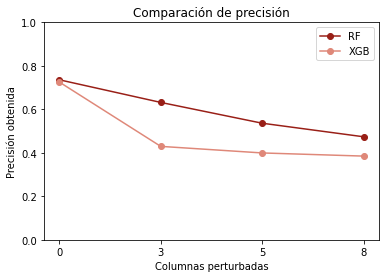

In [443]:
graficar_metricas(cant_columnas_perturbadas, precisiones_RF, precisiones_XGB, 'Comparación de precisión','Precisión obtenida');

## Recall

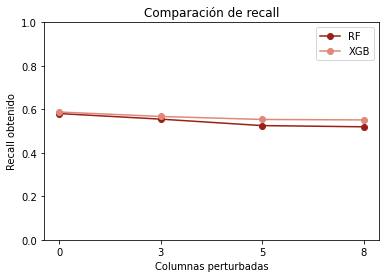

In [442]:
graficar_metricas(cant_columnas_perturbadas, recalls_RF, recalls_XGB, 'Comparación de recall','Recall obtenido');

## Reporte de métricas

In [432]:
data = [{'Precision': precisiones_RF[0], 'Recall': recalls_RF[0]}, {'Precision': precisiones_XGB[0], 'Recall': recalls_XGB[0]}]
df = pd.DataFrame(data, index=['RF', 'XGB'])
df

,Precision,Recall
RF,0.735881,0.580609
XGB,0.725606,0.587640


In [433]:
data = [{'Precision': precisiones_RF[1], 'Recall': recalls_RF[1]}, {'Precision': precisiones_XGB[1], 'Recall': recalls_XGB[1]}]
df = pd.DataFrame(data, index=['RF_1', 'XGB_1'])
df

,Precision,Recall
RF_1,0.631794,0.554930
XGB_1,0.429671,0.567204


In [434]:
data = [{'Precision': precisiones_RF[2], 'Recall': recalls_RF[2]}, {'Precision': precisiones_XGB[2], 'Recall': recalls_XGB[2]}]
df = pd.DataFrame(data, index=['RF_2', 'XGB_2'])
df

,Precision,Recall
RF_2,0.536137,0.525193
XGB_2,0.399437,0.553439


In [435]:
data = [{'Precision': precisiones_RF[3], 'Recall': recalls_RF[3]}, {'Precision': precisiones_XGB[3], 'Recall': recalls_XGB[3]}]
df = pd.DataFrame(data, index=['RF_3', 'XGB_3'])
df

,Precision,Recall
RF_3,0.473763,0.519692
XGB_3,0.384934,0.551336


In [436]:
data = [{'RF': precisiones_RF[0], 'RF1': precisiones_RF[1], 'RF2': precisiones_RF[2], 'RF3': precisiones_RF[3]}, {'RF': recalls_RF[0], 'RF1': recalls_RF[1],'RF2': recalls_RF[2],'RF3': recalls_RF[3]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF,RF1,RF2,RF3
Precision,0.735881,0.631794,0.536137,0.473763
Recall,0.580609,0.554930,0.525193,0.519692


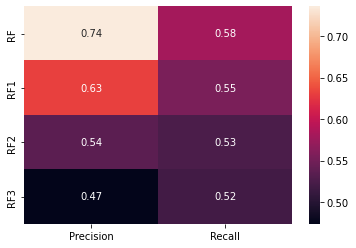

In [437]:
sns.color_palette("rocket", as_cmap=True)
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(df.iloc[:, :].T, annot=True, cmap="rocket")


In [438]:
data = [{'XGB': precisiones_XGB[0], 'XGB1': precisiones_XGB[1], 'XGB2': precisiones_XGB[2], 'XGB3': precisiones_XGB[3]}, {'XGB': recalls_XGB[0], 'XGB1': recalls_XGB[1],'XGB2': recalls_RF[2],'XGB3': recalls_RF[3]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,XGB,XGB1,XGB2,XGB3
Precision,0.725606,0.429671,0.399437,0.384934
Recall,0.587640,0.567204,0.525193,0.519692


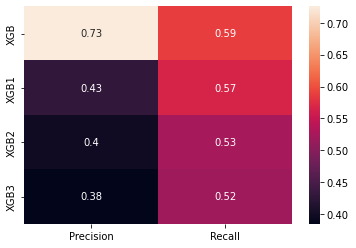

In [439]:
sns.color_palette("rocket", as_cmap=True)
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(df.iloc[:, :].T, annot=True, cmap="rocket")

In [440]:
data = [{'RF': precisiones_RF[0], 'RF1': precisiones_RF[1], 'RF2': precisiones_RF[2], 'RF3': precisiones_RF[3],'XGB': precisiones_XGB[0], 'XGB1': precisiones_XGB[1], 'XGB2': precisiones_XGB[2], 'XGB3': precisiones_XGB[3]}, {'RF': recalls_RF[0], 'RF1': recalls_RF[1],'RF2': recalls_RF[2],'RF3': recalls_RF[3],'XGB': recalls_XGB[0], 'XGB1': recalls_XGB[1],'XGB2': recalls_RF[2],'XGB3': recalls_RF[3]}]
df = pd.DataFrame(data, index=['Precision', 'Recall'])
df

,RF,RF1,RF2,RF3,XGB,XGB1,XGB2,XGB3
Precision,0.735881,0.631794,0.536137,0.473763,0.725606,0.429671,0.399437,0.384934
Recall,0.580609,0.554930,0.525193,0.519692,0.587640,0.567204,0.525193,0.519692


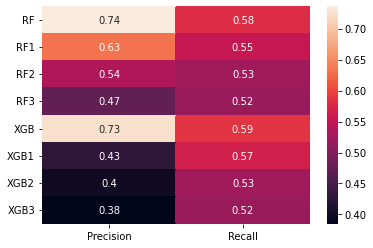

In [441]:
sns.color_palette("rocket", as_cmap=True)
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(df.iloc[:, :].T, annot=True, cmap="rocket")